In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

C:\Users\koll2\AppData\Local\Temp\ipykernel_27572\3630623328.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


[7.24382119 4.84921352 8.02475651 9.37200522 1.15739823 1.0353796
 3.75139938 4.24335606 6.65801223 6.68845717 4.41407373 8.97155326
 9.02715252 8.81860256 1.27826663 7.53742652 0.16174403 5.7733372
 6.63328091 8.98085153 6.81648257 7.05323153 6.98914964 8.8667172
 2.84479106 6.48756805 0.80973526 4.21832443 3.50636579 4.88683239
 5.63734119 6.15694484 1.4313989  7.34844611 2.50514843 4.11280429
 2.37046258 3.01618165 2.69099695 6.10324077 9.88391642 0.18647476
 5.29472141 9.52842706 2.58146127 1.40117187 8.26507849 4.16984489
 7.95026898 1.42129167]
[14.56290114 10.41828892 16.92791657 19.46851463  2.43553515  2.32863964
  7.70417339  8.97165347 13.67198311 13.50937628  9.52517654 18.7898182
 18.50552309 18.04995033  3.23785231 15.89044144  0.42673292 12.37595618
 13.57840207 18.79581324 13.77102026 14.78742768 14.70817693 18.09856395
  6.3733073  13.78923527  2.20738072  8.92093863  7.92170689 10.06327653
 11.80075611 12.85027091  3.16959884 15.30050973  5.0831832   9.09188115
  5.25

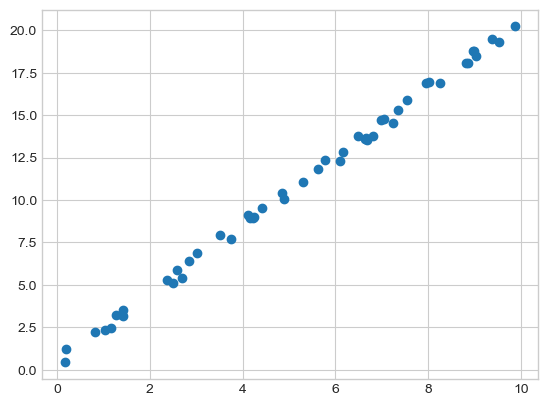

In [15]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
print(x)
print(y)

plt.scatter(x,y)

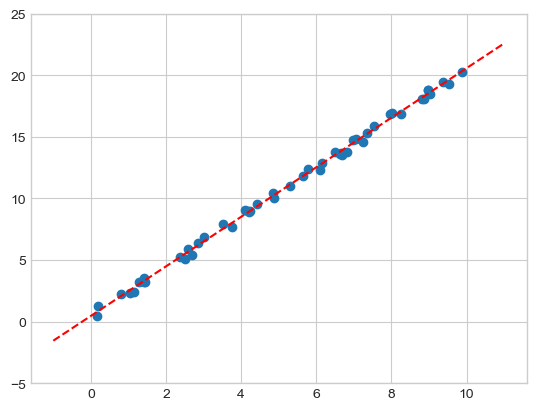

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = x[:, np.newaxis]
model.fit(X,y) # 학습

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.ylim(-5,25)
plt.plot(xfit, yfit, "--r")


In [30]:
print("기울기: %s"%float(model.coef_))
print("절편: %s"%model.intercept_)

기울기: 2.01133115494244
절편: 0.4560518908162372
